In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Starting program...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Starting training process...
Loading training data...
Loading images from /content/drive/MyDrive/train
Found 479 files
Processed 50 images
Processed 100 images
Processed 150 images
Processed 200 images
Processed 250 images
Processed 300 images
Processed 350 images
Processed 400 images
Processed 450 images
Loading test data...
Loading images from /content/drive/MyDrive/test
Found 78 files
Processed 50 images
Training data shape: (477, 224, 224, 3)
Test data shape: (78, 224, 224, 3)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 173056)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    11,075,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,132,098 (42.47 MB)

 Trainable params: 11,132,098 (42.47 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.9723 - loss: 0.1463
Epoch 1
Training Accuracy: 0.9916
Validation Accuracy: 1.0000
Training Loss: 0.0443
Validation Loss: 0.0000
--------------------------------------------------
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 571ms/step - accuracy: 0.9735 - loss: 0.1399 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/20
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 2
Training Accuracy: 1.0000
Validation Accuracy: 1.0000
Training Loss: 0.0000
Validation Loss: 0.0000
--------------------------------------------------
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/20
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 3
Training Accuracy: 1.0000
Validation Accuracy: 1.0000
Training Loss: 0.0000
Validation Loss: 0.0000
--------------------------------------------------
15/15 ━━━━━━━

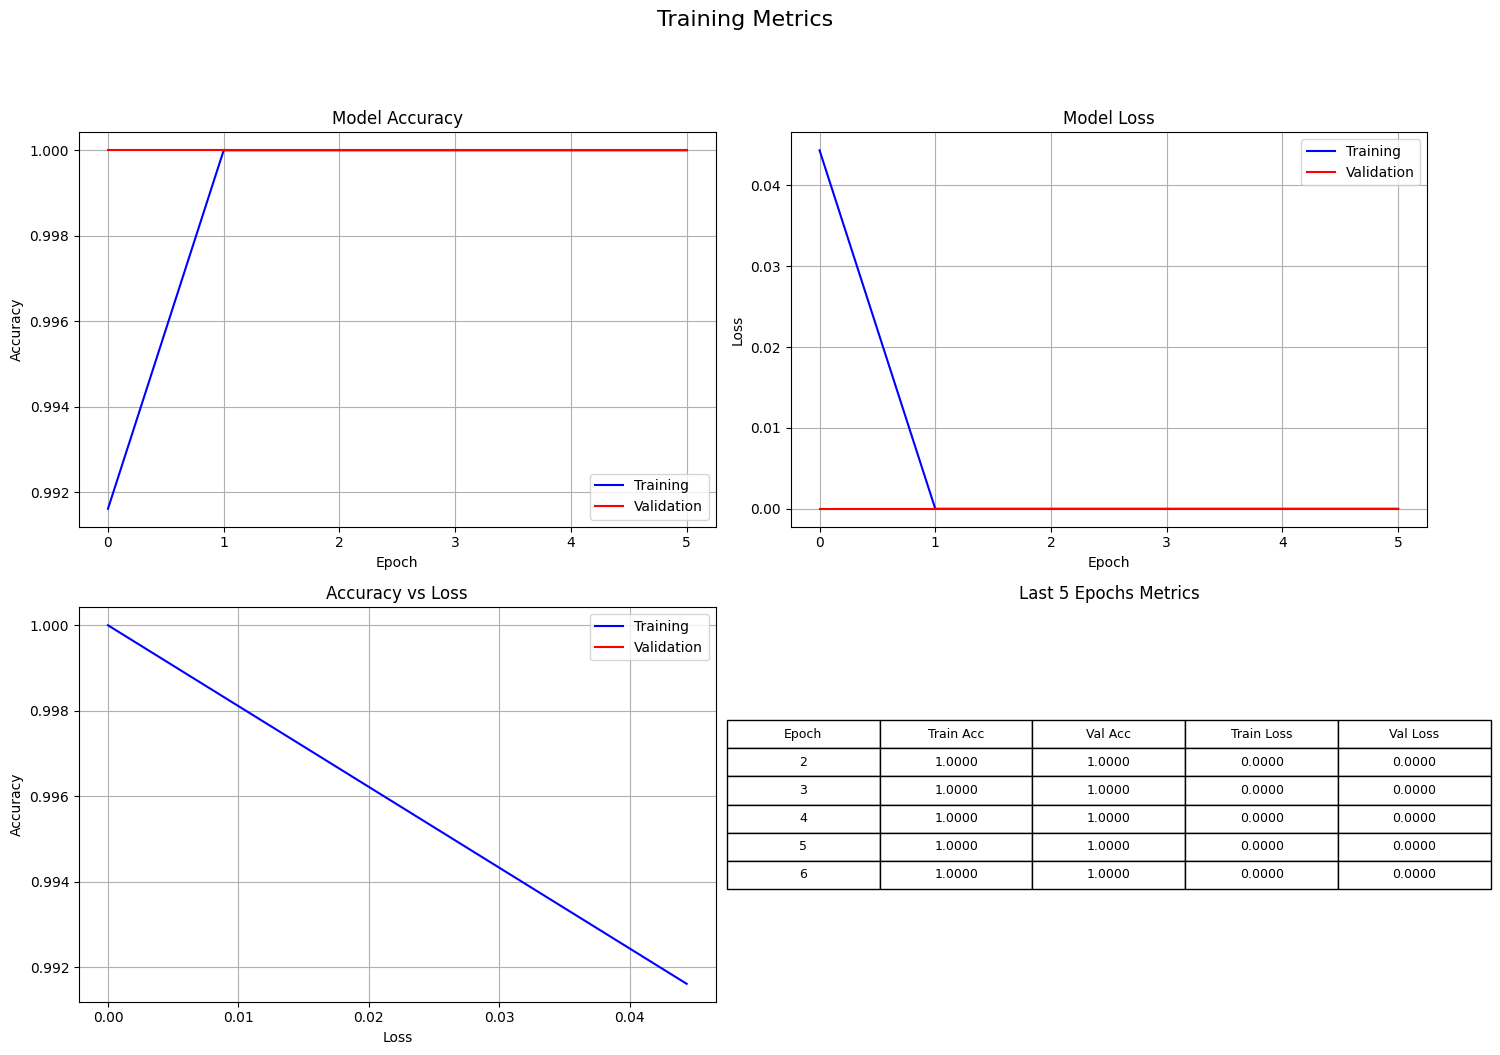


Full Training History:
Epoch  Train Acc  Val Acc    Train Loss  Val Loss
--------------------------------------------------
1      0.9916    1.0000    0.0443    0.0000
2      1.0000    1.0000    0.0000    0.0000
3      1.0000    1.0000    0.0000    0.0000
4      1.0000    1.0000    0.0000    0.0000
5      1.0000    1.0000    0.0000    0.0000
6      1.0000    1.0000    0.0000    0.0000

Generating predictions for test set...
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step

Preparing model for download...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_images_from_directory(directory):
    print(f"Loading images from {directory}")
    images = []
    labels = []

    # List all files in directory
    files = os.listdir(directory)
    print(f"Found {len(files)} files")

    for filename in files:
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            try:
                # Load image
                img_path = os.path.join(directory, filename)
                img = load_img(img_path, target_size=(224, 224))
                img_array = img_to_array(img)
                img_array = img_array / 255.0  # Normalize
                images.append(img_array)

                # Determine label from filename
                if 'human' in filename.lower():
                    labels.append([1, 0])  # Human
                else:
                    labels.append([0, 1])  # Animal

                if len(images) % 50 == 0:
                    print(f"Processed {len(images)} images")

            except Exception as e:
                print(f"Error loading {filename}: {e}")
                continue

    return np.array(images), np.array(labels)

def create_training_plots(history):
    # Create figure with subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Training Metrics', fontsize=16, y=1.05)

    # Plot accuracy
    ax1.plot(history.history['accuracy'], 'b-', label='Training')
    ax1.plot(history.history['val_accuracy'], 'r-', label='Validation')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)

    # Plot loss
    ax2.plot(history.history['loss'], 'b-', label='Training')
    ax2.plot(history.history['val_loss'], 'r-', label='Validation')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)

    # Plot accuracy vs loss
    ax3.plot(history.history['loss'], history.history['accuracy'], 'b-', label='Training')
    ax3.plot(history.history['val_loss'], history.history['val_accuracy'], 'r-', label='Validation')
    ax3.set_title('Accuracy vs Loss')
    ax3.set_xlabel('Loss')
    ax3.set_ylabel('Accuracy')
    ax3.legend()
    ax3.grid(True)

    # Create metrics table
    epoch_data = []
    for i in range(len(history.history['accuracy'])):
        epoch_data.append([
            i+1,
            history.history['accuracy'][i],
            history.history['val_accuracy'][i],
            history.history['loss'][i],
            history.history['val_loss'][i]
        ])

    # Plot table
    table_data = [['Epoch', 'Train Acc', 'Val Acc', 'Train Loss', 'Val Loss']]
    for row in epoch_data[-5:]:  # Show last 5 epochs
        table_data.append([f'{row[0]}',
                          f'{row[1]:.4f}',
                          f'{row[2]:.4f}',
                          f'{row[3]:.4f}',
                          f'{row[4]:.4f}'])

    ax4.axis('tight')
    ax4.axis('off')
    table = ax4.table(cellText=table_data, loc='center', cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1.2, 1.5)
    ax4.set_title('Last 5 Epochs Metrics')

    plt.tight_layout()
    plt.show()

    # Print full metrics table
    print("\nFull Training History:")
    print("Epoch  Train Acc  Val Acc    Train Loss  Val Loss")
    print("-" * 50)
    for row in epoch_data:
        print(f"{row[0]:<6d} {row[1]:.4f}    {row[2]:.4f}    {row[3]:.4f}    {row[4]:.4f}")

def create_confusion_matrix(y_true, y_pred):
    # Convert from one-hot encoding to class labels
    y_true = np.argmax(y_true, axis=1)
    y_pred = np.argmax(y_pred, axis=1)

    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Create figure
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')

    # Add numbers
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

    # Add ticks
    plt.xticks([0, 1], ['Human', 'Animal'])
    plt.yticks([0, 1], ['Human', 'Animal'])

    plt.tight_layout()
    plt.show()

def train_model():
    print("Starting training process...")

    # Load data
    TRAIN_PATH = '/content/drive/MyDrive/train'
    TEST_PATH = '/content/drive/MyDrive/test'

    print("Loading training data...")
    X_train, y_train = load_images_from_directory(TRAIN_PATH)
    print("Loading test data...")
    X_test, y_test = load_images_from_directory(TEST_PATH)

    print(f"Training data shape: {X_train.shape}")
    print(f"Test data shape: {X_test.shape}")

    # Create model
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(2, activation='softmax')
    ])

    # Print model summary
    model.summary()

    # Custom callback to track metrics
    class MetricsHistory(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            print(f"\nEpoch {epoch + 1}")
            print(f"Training Accuracy: {logs.get('accuracy'):.4f}")
            print(f"Validation Accuracy: {logs.get('val_accuracy'):.4f}")
            print(f"Training Loss: {logs.get('loss'):.4f}")
            print(f"Validation Loss: {logs.get('val_loss'):.4f}")
            print("-" * 50)

    # Compile model
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Callbacks
    callbacks = [
        MetricsHistory(),
        tf.keras.callbacks.ModelCheckpoint(
            'best_model.keras',
            monitor='val_accuracy',
            save_best_only=True
        ),
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            verbose=1,
            restore_best_weights=True
        )
    ]

    # Train model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=20,
        batch_size=32,
        callbacks=callbacks,
        verbose=1
    )

    return model, history, X_test, y_test

# Main execution
if __name__ == "__main__":
    print("Starting program...")

    # Mount Google Drive
    from google.colab import drive
    drive.mount('/content/drive')

    # Train model
    tf_model, history, X_test, y_test = train_model()
    # Create training visualization plots
    create_training_plots(history)

    # Generate predictions
    print("\nGenerating predictions for test set...")
    # Use tf_model instead of model
    predictions = tf_model.predict(X_test)
   # Enable model download
    print("\nPreparing model for download...")
    from google.colab import files # import the files module from google.colab
    files.download("best_model.keras") # Download the best model

RCNN


In [3]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load Dataset
def load_images_from_folder(folder, label, img_size=(128, 128)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, img_size)
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

# Example paths for human and animal images
human_images_path = '/content/drive/MyDrive/1'
animal_images_path = '/content/drive/MyDrive/Chicken'

# Load the data
human_images, human_labels = load_images_from_folder(human_images_path, label=0)  # 0 for human
animal_images, animal_labels = load_images_from_folder(animal_images_path, label=1)  # 1 for animal

# Combine data and split into train/test sets
X = np.concatenate((human_images, animal_images), axis=0)
y = np.concatenate((human_labels, animal_labels), axis=0)
X = X / 255.0  # Normalize pixel values
y = to_categorical(y, 2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Augmentation
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
datagen.fit(X_train)

# CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 2 classes: human and animal
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    epochs=20, callbacks=[early_stopping])

# Save the model
model.save('human_animal_detector.h5')

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 448ms/step - accuracy: 0.7190 - loss: 0.5202 - val_accuracy: 0.8857 - val_loss: 0.2399
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.8858 - loss: 0.3241 - val_accuracy: 0.8857 - val_loss: 0.2680
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - accuracy: 0.8952 - loss: 0.2755 - val_accuracy: 0.9143 - val_loss: 0.2331
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 0.8993 - loss: 0.2729 - val_accuracy: 0.9286 - val_loss: 0.1986
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - accuracy: 0.9118 - loss: 0.2385 - val_accuracy: 0.9357 - val_loss: 0.1640
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 206ms/step - accuracy: 0.9263 - loss: 0.2083 - val_accuracy: 0.9357 - val_loss: 0.1938
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.9176 - loss: 0.1962 - val_accuracy: 0.9143 - val_loss: 0.2000
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.9361 - loss: 0.1745 - val_accuracy: 0

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


100%|██████████| 160M/160M [00:00<00:00, 186MB/s]


Detected Humans: 1


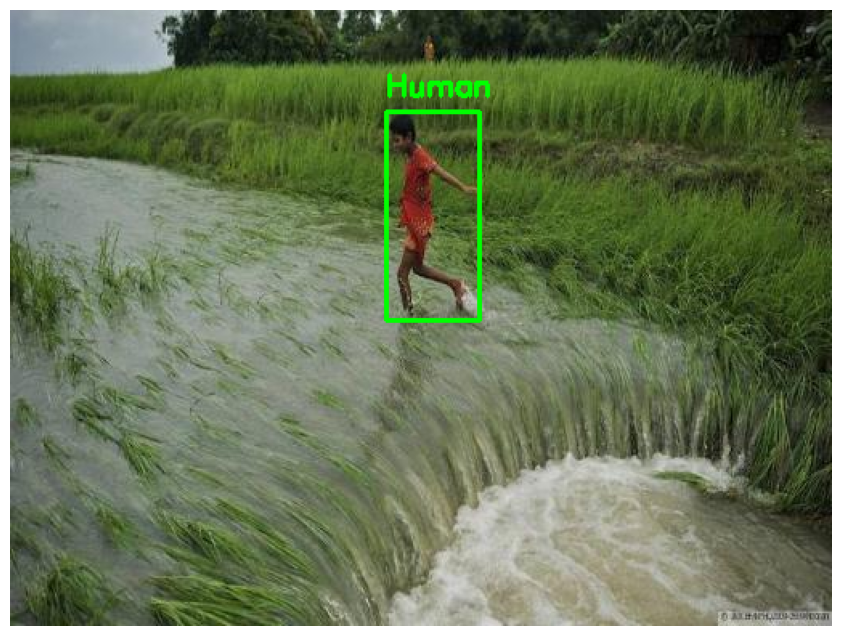

Exact human count in image: 1


In [4]:
# ipython-input-12-21f7ded96d2d
# Install necessary libraries
!pip install torch torchvision
# Import necessary libraries
import torch
import cv2
import numpy as np
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt

# Initialize the model with pretrained weights
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set the model to evaluation mode

# Define the image transformation
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Function to detect and count humans
def count_humans(image_path):
    # Load the image
    image = Image.open(image_path).convert("RGB")
    img_tensor = transform(image)
    img_tensor = img_tensor.unsqueeze(0)

    # Run the model on the image
    with torch.no_grad():
        predictions = model(img_tensor)

    # Process detections
    boxes = predictions[0]['boxes']
    labels = predictions[0]['labels']
    scores = predictions[0]['scores']

    human_count = 0
    human_boxes = []

    # Threshold for human detection confidence
    threshold = 0.5

    for i in range(len(labels)):
        if labels[i] == 1 and scores[i] > threshold:  # COCO label '1' is for person
            human_count += 1
            human_boxes.append(boxes[i].cpu().numpy())

    # Draw bounding boxes and add grid overlay
    img_cv2 = cv2.imread(image_path)
    for box in human_boxes:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(img_cv2, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img_cv2, "Human", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    # Display the results
    print(f"Detected Humans: {human_count}")
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    return human_count

# Test the function with your image
image_path = '/content/drive/MyDrive/test/image_0143.jpg'  # Replace with your image path
human_count = count_humans(image_path)
print(f"Exact human count in image: {human_count}")